In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([\
                   ['frank', 'M',    np.nan], \
                   ['mary' , np.nan, np.nan], \
                   ['tom'  , 'M',    35], \
                   ['ted'  , 'M',    33], \
                   ['jean' , np.nan, 21], \
                   ['lisa' , 'F',    20]])
df.columns = ['name', 'gender', 'age']
df


,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [3]:
df['gender']

0      M
1    NaN
2      M
3      M
4    NaN
5      F
Name: gender, dtype: object

In [4]:
df.gender

0      M
1    NaN
2      M
3      M
4    NaN
5      F
Name: gender, dtype: object

In [5]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [6]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [7]:
df[df['gender'].notnull()]

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [9]:
df['name'].isnull().values.any()

False

In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [12]:
df.isnull().sum().sum()

4

In [14]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [13]:
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [16]:
df['employee'] = np.nan

In [17]:
df

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [25]:
?df.dropna

In [22]:
df.dropna(how = 'all', axis=1, inplace=True)

In [26]:
df.dropna(thresh = 2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [27]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [28]:
df.fillna(0)

,name,gender,age
0,frank,M,0.0
1,mary,0,0.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,0,21.0
5,lisa,F,20.0


In [30]:
#df['age'] = df['age'].fillna(0)

In [31]:
df["age"].mean()

27.25

In [35]:
# select gender, avg(age) from df group by gender
df.groupby("gender")["age"].mean()

gender
F    20.0
M    34.0
Name: age, dtype: float64

In [33]:
# select gender, sum(age) from df group by gender
df.groupby("gender")["age"].sum()

gender
F    20.0
M    68.0
Name: age, dtype: float64

In [37]:
df.groupby("gender")["age"].transform("mean")

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [40]:
df['age'] = df['age'].fillna(df.groupby("gender")["age"].transform("mean"))

In [41]:
df

,name,gender,age
0,frank,M,34.0
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [42]:
df.fillna(method = 'pad')

,name,gender,age
0,frank,M,34.0
1,mary,M,34.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,M,21.0
5,lisa,F,20.0


In [43]:
df.fillna(method = 'bfill')

,name,gender,age
0,frank,M,34.0
1,mary,M,35.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,F,21.0
5,lisa,F,20.0


In [44]:
df2 = pd.DataFrame([[1, 870],\
                    [2, 900],\
                    [np.nan, np.nan],\
                    [4, 950],\
                    [5,1080],\
                    [6,1200]])
df2.columns = ['time', 'val']


In [45]:
df2

,time,val
0,1.0,870.0
1,2.0,900.0
2,NaN,NaN
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


In [46]:
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


In [47]:
df

,name,gender,age
0,frank,M,34.0
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [48]:
df3 = pd.DataFrame([[1, 870],\
                    [2, 900],\
                    [4, 950],\
                    [5,9999],\
                    [6,1200]])
df3.columns = ['time', 'val']


In [54]:
df3.loc[df3['val'] > 5000,  'val' ] = np.nan

In [55]:
df3

,time,val
0,1,870.0
1,2,900.0
2,4,950.0
3,5,NaN
4,6,1200.0


In [71]:
import random
temp = [random.randint(5,35) for i in range(100)]

In [72]:
np_temp = np.array(temp)

In [73]:
np_temp.mean()

20.18

In [74]:
temp.extend([999,999,999])
np_temp2 = np.array(temp)

In [77]:
#np_temp2

In [76]:
np_temp2.mean()

48.689320388349515

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


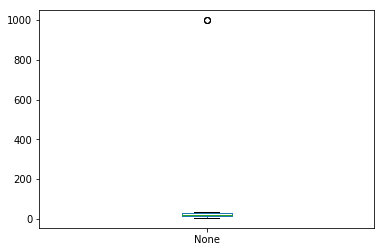

In [81]:
%pylab inline
pd.Series(np_temp2).plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


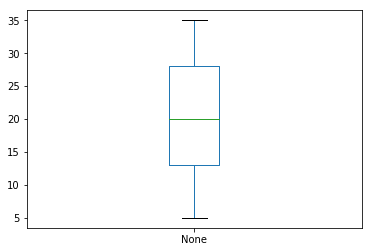

In [82]:
%pylab inline
pd.Series(np_temp2[np_temp2 < 100]).plot(kind = 'box')